# Naive Bayes with sklearn

We saw in class that Naive Bayes is a probabilistic classifier, that can easily support categorical and quantitative variables.

Problem is ... `sklearn` does not natively work with both ...

We will need to split again our data in quantitative and qualitative, and then code our own suggestions to take both into account.

You can start with quantitative or qualitative data depending on the majority data type in your dataset.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("../titanic.csv").fillna(method="backfill")

In [2]:
# My target is survived 
y = df.Survived.values
# For demonstration, I'm taking only 4 columns
categorical_variables = ["Sex", "Embarked"]
quantitative_variables = ["Age", "Fare"]
X = df[categorical_variables + quantitative_variables].values
X_quantitative = df[quantitative_variables].values
X_categorical = df[categorical_variables].values

## Working with quantitative data
With quantitative data, we can use the `GaussianNB` class.

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [4]:
gaussian_nb = GaussianNB()

print("======= Training")
gaussian_nb.fit(X_quantitative, y)

print("======= Prediction")
predictions = gaussian_nb.predict(X_quantitative)

print("======= Results")
print(classification_report(y, predictions))

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

           0       0.66      0.95      0.78       549
           1       0.72      0.22      0.33       342

    accuracy                           0.67       891
   macro avg       0.69      0.58      0.56       891
weighted avg       0.68      0.67      0.61       891



In [5]:
predictions = gaussian_nb.predict_proba(X_quantitative)


**Questions**:
1. Plot the statistical distribution of your variables and see if any is highly skewed.
2. Apply Gaussian Naive Bayes to the quantitative variables of your dataset.
3. Retrieve class probability and plot the results as a function of the different features, using heatmap colors.
4. Perform k-fold cross-validation and return the classification scores (accuracy, recall, precision).
6. Try removing highly correlated data and see if your results improve.

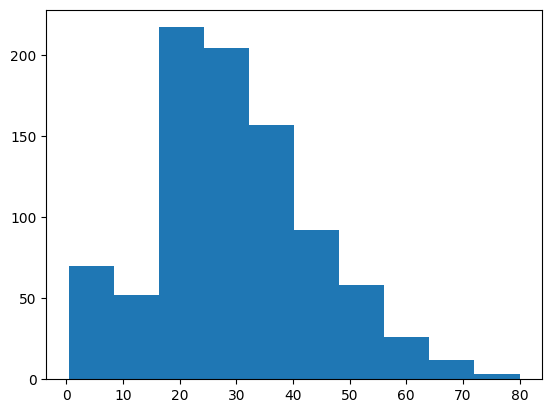

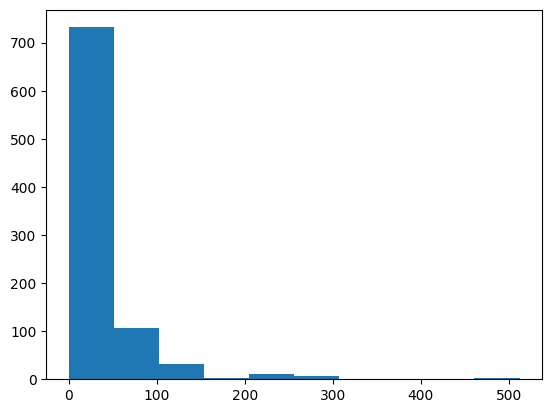

In [6]:
# Question 1
for var in X_quantitative.T:
    plt.hist(var)
    plt.show()

In [7]:
#Question 2
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_quantitative,y)
predictions = gaussian_nb.predict(X_quantitative)

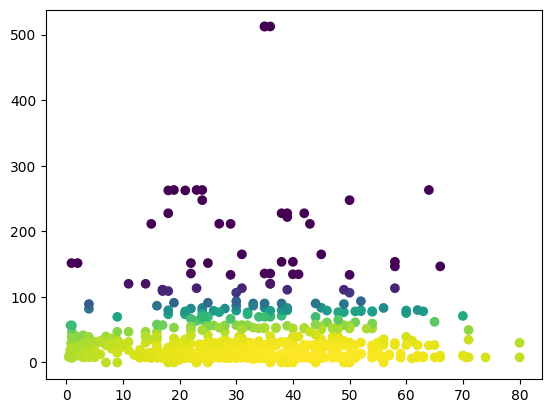

In [8]:
#Question 3
predicted_proba = gaussian_nb.predict_proba(X_quantitative)
plt.scatter(X_quantitative[:,0], X_quantitative[:,1],c=predicted_proba[:,0])

In [9]:
# Question 4
from sklearn.model_selection import cross_val_score

gaussian_nb = GaussianNB()

scores = cross_val_score(estimator=gaussian_nb, X=X_quantitative, y=y)
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Median accuracy: {np.median(scores)}")


Mean accuracy: 0.6701211474483711
Median accuracy: 0.6797752808988764


## Working with qualitative data
With qualitative data, we can use the class CategoricalNB.

In [10]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()
encoded_vars = []
for category in X_categorical.T:
    encoded_vars.append(encoder.fit_transform(category))

In [12]:
X_cat = np.array(encoded_vars).T

In [13]:
gaussian_nb_categorical = CategoricalNB()

print("======= Training")
gaussian_nb_categorical.fit(X_cat, y)

print("======= Prediction")
predictions = gaussian_nb_categorical.predict(X_cat)

print("======= Results")
print(classification_report(y, predictions))

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



**Questions**:
1. Apply Gaussian Naive Bayes to the qualitative variables of your dataset.
3. Retrieve class probability and plot the results as a function of the different features, using heatmap colors.
4. Perform k-fold cross-validation and return the classification scores (accuracy, recall, precision).
5. Compare to previous results.
6. Transform every variable within your dataset to a qualitative using the class `sklearn.preprocessing.KBinsDiscretizer` and compare with previous results.
7. Compare to what you achieved using `knn`.

In [14]:
import seaborn as sns

In [15]:
predict_probas = gaussian_nb_categorical.predict_proba(X_cat)

df = pd.DataFrame(X_categorical)
df_cat = df.assign(proba=predict_probas[:,0])

<Axes: xlabel='proba', ylabel='0'>

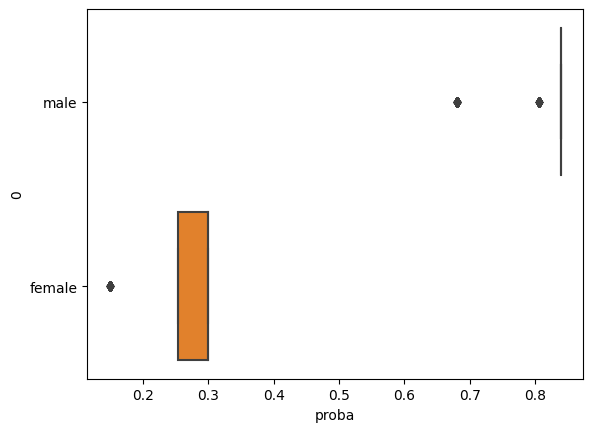

In [16]:
sns.boxplot(df_cat, x="proba", y=0)


## Working with both data types
It is annoying that sklearn does not allow to deal with both variables types...

A solution to solve this is to:
- Fit a GaussianNB on the quantitative variables and get the probabilities `quantitative_probabilities`
- Fit a CategoricalNB on the qualitative variables `qualitative_probabilities`
- Fit a new GaussianNB on the probbailities `quantitative_probabilities` and `qualitative_probabilities`.

**Question**:
1. Implement this solution and compare the results with what you obtained previously.
2. **Bonus**: Suggest your own implementation using `sklearn` API for classifiers (see https://scikit-learn.org/stable/developers/develop.html).


In [59]:
# Implementation of a two step gaussian nb model

# Using the full dataset
gaussian_nb_quanta = GaussianNB()
gaussian_nb_quanta.fit(X_quantitative, y)
gaussian_nb_categorical = CategoricalNB()
gaussian_nb_categorical.fit(X_cat, y)

gaussian_full = GaussianNB()
proba_matrix = np.concatenate([gaussian_nb_quanta.predict_proba(X_quantitative)[:,0].reshape(-1,1), gaussian_nb_categorical.predict_proba(X_cat)[:,0].reshape(-1, 1)], axis=1)
gaussian_full.fit(proba_matrix, y)

print("===== Accuracy using full dataset")
gaussian_full.score(proba_matrix, y)


===== Accuracy using full dataset


0.7822671156004489

In [60]:
# Next step to do: use train / test or cross val approach using this method.